Thực hiện phân tích mô tả cho dữ liệu chuyến bay "nycflights.csv":
1. Cho cột dep_delay (khởi hành trễ)
2. Cho cột arr_delay (đến nơi trễ)
3. Cho cột distance (khoảng cách chuyến bay)
4. Sử dụng linear regression xây dựng mô hình dự đoán thời gian đến nơi trễ 
(arr_delay) dựa vào thời gian xuất phát trễ (dep_delay) và khoảng cách 
(distance)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu từ file CSV
data = pd.read_csv('nycflights.csv')

In [57]:
#1. Cho cột dep_delay (khởi hành trễ)
# Nội suy tuyến tính cho cột 'dep_delay'
data['dep_delay'] = data['dep_delay'].interpolate()

# Lấy cột 'dep_delay'
dep_delay = data['dep_delay']

# Phân tích mô tả cho cột 'dep_delay'
description = dep_delay.describe()
print(description)

count    336776.000000
mean         14.093484
std          42.529939
min         -43.000000
25%          -5.000000
50%          -1.000000
75%          12.000000
max        1301.000000
Name: dep_delay, dtype: float64


Dựa trên thông tin trên, chúng ta có thể thực hiện phân tích mô tả cho cột 'dep_delay' như sau:

- Số lượng quan sát (count): 336,776
- Giá trị trung bình (mean): 14.09
- Độ lệch chuẩn (standard deviation): 42.53
- Giá trị nhỏ nhất (minimum): -43
- Phân vị 25% (25th percentile): -5
- Phân vị 50% (50th percentile hoặc median): -1
- Phân vị 75% (75th percentile): 12
- Giá trị lớn nhất (maximum): 1301
- Phân tích mô tả trên cho thấy:

Trung bình của 'dep_delay' là 14.09, cho biết trung bình các chuyến bay khởi hành bị trễ khoảng 14.09 phút.
Độ lệch chuẩn là 42.53, cho thấy sự biến động lớn trong thời gian trễ của các chuyến bay khởi hành.
Giá trị nhỏ nhất là -43 và giá trị lớn nhất là 1301, cho thấy sự đa dạng về thời gian trễ của các chuyến bay khởi hành.
Phân vị 25% là -5, phân vị 50% (median) là -1, và phân vị 75% là 12, cho thấy phân bố của dữ liệu trễ khởi hành.

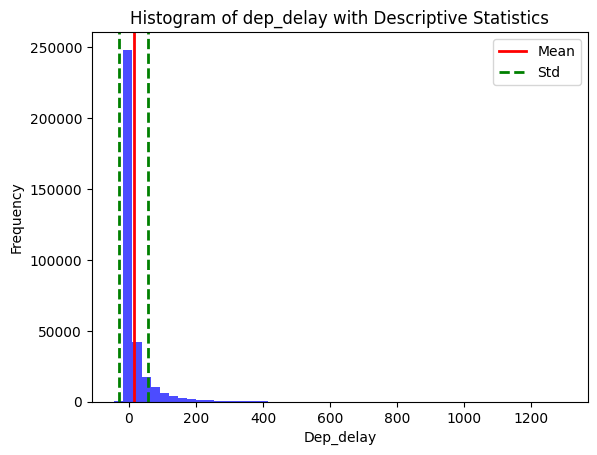

In [58]:
# Tính giá trị trung bình và độ lệch chuẩn
mean = data['dep_delay'].mean()
std = data['dep_delay'].std()

# Vẽ biểu đồ histogram cho cột 'dep_delay'
plt.hist(data['dep_delay'], bins=50, color='blue', alpha=0.7)

# Vẽ đường thể hiện giá trị trung bình
plt.axvline(mean, color='red', linestyle='solid', linewidth=2, label='Mean')

# Vẽ đường thể hiện độ lệch chuẩn bên trái giá trị trung bình
plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label='Std')

# Vẽ đường thể hiện độ lệch chuẩn bên phải giá trị trung bình
plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=2)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Histogram of dep_delay with Descriptive Statistics')
plt.xlabel('Dep_delay')
plt.ylabel('Frequency')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [59]:
#2. Cho cột arr_delay (đến nơi trễ)
# Nội suy tuyến tính cho cột 'arr_delay'
data['arr_delay'] = data['arr_delay'].interpolate()

# Lấy cột 'arr_delay'
arr_delay = data['arr_delay']

# Phân tích mô tả cho cột 'arr_delay'
description_arr = arr_delay.describe()
print(description_arr)

count    336776.000000
mean          8.440162
std          46.570691
min         -86.000000
25%         -17.000000
50%          -4.000000
75%          15.000000
max        1272.000000
Name: arr_delay, dtype: float64


Dựa trên thông tin trên, chúng ta có thể thực hiện phân tích mô tả cho cột 'arr_delay' như sau:

- Số lượng quan sát (count): 336,776
- Giá trị trung bình (mean): 8.44
- Độ lệch chuẩn (standard deviation): 46.57
- Giá trị nhỏ nhất (minimum): -86
- Phân vị 25% (25th percentile): -17
- Phân vị 50% (50th percentile hoặc median): -4
- Phân vị 75% (75th percentile): 15
- Giá trị lớn nhất (maximum): 1272
- Phân tích mô tả trên cho thấy:

Trung bình của 'arr_delay' là 8.44, cho biết trung bình các chuyến bay đến đích bị trễ khoảng 8.44 phút.
Độ lệch chuẩn là 46.57, cho thấy sự biến động lớn trong thời gian trễ của các chuyến bay.
Giá trị nhỏ nhất là -86 và giá trị lớn nhất là 1272, cho thấy sự đa dạng về thời gian trễ của các chuyến bay.
Phân vị 25% là -17, phân vị 50% (median) là -4, và phân vị 75% là 15, cho thấy phân bố của dữ liệu trễ đến đích.

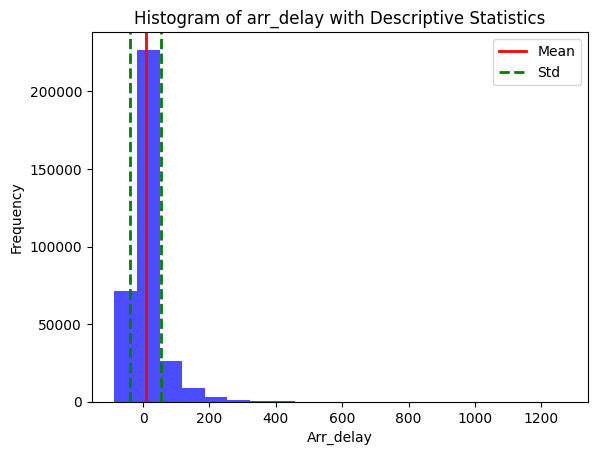

In [60]:
# Tính giá trị trung bình và độ lệch chuẩn
mean_arr = data['arr_delay'].mean()
std_arr = data['arr_delay'].std()

# Vẽ biểu đồ histogram cho cột 'dep_delay'
plt.hist(data['arr_delay'], bins=20, color='blue', alpha=0.7)

# Vẽ đường thể hiện giá trị trung bình
plt.axvline(mean_arr, color='red', linestyle='solid', linewidth=2, label='Mean')

# Vẽ đường thể hiện độ lệch chuẩn bên trái giá trị trung bình
plt.axvline(mean_arr - std_arr, color='green', linestyle='dashed', linewidth=2, label='Std')

# Vẽ đường thể hiện độ lệch chuẩn bên phải giá trị trung bình
plt.axvline(mean_arr + std_arr, color='green', linestyle='dashed', linewidth=2)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Histogram of arr_delay with Descriptive Statistics')
plt.xlabel('Arr_delay')
plt.ylabel('Frequency')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [61]:
#3. Cho cột distance (khoảng cách chuyến bay)
# Lấy cột 'distance'
distance = data['distance']

# Phân tích mô tả cho cột 'distance'
description_dis = distance.describe()
print(description_dis)

count    336776.000000
mean       1039.912604
std         733.233033
min          17.000000
25%         502.000000
50%         872.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64


Dựa trên thông tin trên, chúng ta có thể thực hiện phân tích mô tả cho cột 'distance' như sau:

- Số lượng quan sát (count): 336,776
- Giá trị trung bình (mean): 1,039.91
- Độ lệch chuẩn (standard deviation): 733.23
- Giá trị nhỏ nhất (minimum): 17
- Phân vị 25% (25th percentile): 502
- Phân vị 50% (50th percentile hoặc median): 872
- Phân vị 75% (75th percentile): 1,389
- Giá trị lớn nhất (maximum): 4,983
- Phân tích mô tả trên cho thấy:

Trung bình của 'distance' là 1,039.91, cho biết trung bình khoảng cách của các chuyến bay là 1,039.91 dặm.
Độ lệch chuẩn là 733.23, cho thấy sự biến động lớn trong khoảng cách của các chuyến bay.
Giá trị nhỏ nhất là 17 và giá trị lớn nhất là 4,983, cho thấy sự đa dạng về khoảng cách của các chuyến bay.
Phân vị 25% là 502, phân vị 50% (median) là 872, và phân vị 75% là 1,389, cho thấy phân bố của dữ liệu khoảng cách.

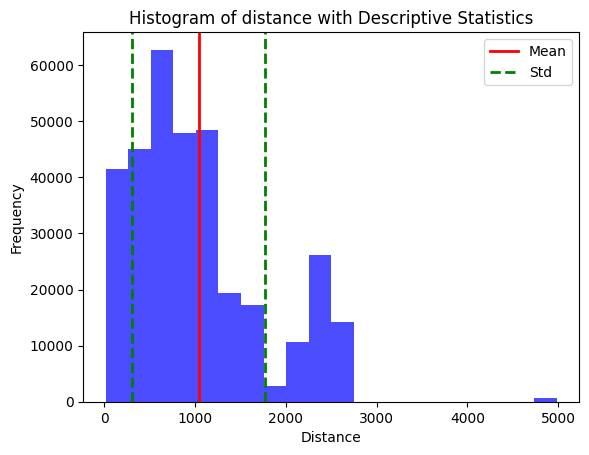

In [62]:
# Tính giá trị trung bình và độ lệch chuẩn
mean_dis = data['distance'].mean()
std_dis = data['distance'].std()

# Vẽ biểu đồ histogram cho cột 'dep_delay'
plt.hist(data['distance'], bins=20, color='blue', alpha=0.7)

# Vẽ đường thể hiện giá trị trung bình
plt.axvline(mean_dis, color='red', linestyle='solid', linewidth=2, label='Mean')

# Vẽ đường thể hiện độ lệch chuẩn bên trái giá trị trung bình
plt.axvline(mean_dis - std_dis, color='green', linestyle='dashed', linewidth=2, label='Std')

# Vẽ đường thể hiện độ lệch chuẩn bên phải giá trị trung bình
plt.axvline(mean_dis + std_dis, color='green', linestyle='dashed', linewidth=2)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Histogram of distance with Descriptive Statistics')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [63]:
#4.Sử dụng linear regression xây dựng mô hình dự đoán thời gian đến nơi trễ (arr_delay) dựa vào thời gian xuất phát trễ (dep_delay) và khoảng cách (distance)

# Tạo ma trận X chứa hai cột dep_delay và distance
X = np.column_stack((dep_delay, distance))

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, arr_delay, test_size=0.2, random_state=42)

# Xây dựng mô hình linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Sử dụng mô hình để dự đoán thời gian đến nơi trễ mới
new_dep_delay = np.array([10, 20, 30])
new_distance = np.array([1000, 1500, 2000])
new_X = np.column_stack((new_dep_delay, new_distance))
new_arr_delay = model.predict(new_X)
print('New Arrival Delays:', new_arr_delay)

Mean Squared Error: 330.5969666881698
R-squared: 0.8450745665252771
New Arrival Delays: [ 4.42605221 13.19873755 21.9714229 ]


Nâng cao: tiếp tục với dữ liệu 'nycflights.csv'
1. Thực hiện phân tích mô tả cho 3 cột ở trên nhưng chia theo nơi xuất phát: 
cột origin (gồm 3 sân bay: JFK, LGA, EWR)
2. Chia ra làm 3 mô hình cho 3 sân bay xuất phát (JFK, LGA, EWR) và nhận xét 
về độ chính xác so với mô hình chung

In [64]:
#1. Thực hiện phân tích mô tả cho 3 cột ở trên nhưng chia theo nơi xuất phát: cột origin (gồm 3 sân bay: JFK, LGA, EWR)
# Tính toán các thống kê mô tả theo sân bay 'origin'
stats_by_origin = data.groupby('origin')[['dep_delay', 'arr_delay', 'distance']].describe()

# Hiển thị kết quả
for origin, stats in stats_by_origin.iterrows():
    print(f"Phân tích mô tả cho sân bay {origin}:")
    print(stats)
    print()

Phân tích mô tả cho sân bay EWR:
dep_delay  count    120835.000000
           mean         16.683920
           std          43.872856
           min         -25.000000
           25%          -4.000000
           50%           0.000000
           75%          16.000000
           max        1126.000000
arr_delay  count    120835.000000
           mean         10.777898
           std          47.647292
           min         -86.000000
           25%         -15.000000
           50%          -3.000000
           75%          18.000000
           max        1109.000000
distance   count    120835.000000
           mean       1056.742790
           std         730.223943
           min          17.000000
           25%         529.000000
           50%         872.000000
           75%        1400.000000
           max        4963.000000
Name: EWR, dtype: float64

Phân tích mô tả cho sân bay JFK:
dep_delay  count    111279.000000
           mean         13.158907
           std         

In [65]:
#2. Chia ra làm 3 mô hình cho 3 sân bay xuất phát (JFK, LGA, EWR) và nhận xét về độ chính xác so với mô hình chung
# Lọc dữ liệu cho các sân bay JFK, LGA và EWR
filtered_data = data[data['origin'].isin(['JFK', 'LGA', 'EWR'])]

# Chọn tính năng đầu vào và biến mục tiêu
features = ['dep_delay', 'distance']
target = 'arr_delay'

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra cho từng sân bay
jfk_data = filtered_data[filtered_data['origin'] == 'JFK']
lga_data = filtered_data[filtered_data['origin'] == 'LGA']
ewr_data = filtered_data[filtered_data['origin'] == 'EWR']

# Chia dữ liệu cho từng sân bay thành tập huấn luyện và tập kiểm tra
jfk_train, jfk_test, jfk_train_target, jfk_test_target = train_test_split(jfk_data[features], jfk_data[target], test_size=0.2, random_state=42)
lga_train, lga_test, lga_train_target, lga_test_target = train_test_split(lga_data[features], lga_data[target], test_size=0.2, random_state=42)
ewr_train, ewr_test, ewr_train_target, ewr_test_target = train_test_split(ewr_data[features], ewr_data[target], test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính cho từng sân bay
jfk_model = LinearRegression()
lga_model = LinearRegression()
ewr_model = LinearRegression()

# Đào tạo mô hình cho từng sân bay
jfk_model.fit(jfk_train, jfk_train_target)
lga_model.fit(lga_train, lga_train_target)
ewr_model.fit(ewr_train, ewr_train_target)

# Dự đoán trên các bộ kiểm tra cho từng sân bay
jfk_predictions = jfk_model.predict(jfk_test)
lga_predictions = lga_model.predict(lga_test)
ewr_predictions = ewr_model.predict(ewr_test)

# Đánh giá các mô hình sử dụng sai số bình phương trung bình cho từng sân bay
jfk_mse = mean_squared_error(jfk_test_target, jfk_predictions)
lga_mse = mean_squared_error(lga_test_target, lga_predictions)
ewr_mse = mean_squared_error(ewr_test_target, ewr_predictions)

# Tính R-squared cho mỗi sân bay
jfk_r2 = r2_score(jfk_test_target, jfk_predictions)
lga_r2 = r2_score(lga_test_target, lga_predictions)
ewr_r2 = r2_score(ewr_test_target, ewr_predictions)

print('Mean Squared Error for JFK:', jfk_mse)
print('R-squared for JFK:', jfk_r2)
print('Mean Squared Error for LGA:', lga_mse)
print('R-squared for LGA:', lga_r2)
print('Mean Squared Error for EWR:', ewr_mse)
print('R-squared for EWR:', ewr_r2)

Mean Squared Error for JFK: 362.3041231017456
R-squared for JFK: 0.8336557825690951
Mean Squared Error for LGA: 337.9401315646017
R-squared for LGA: 0.8454686915768561
Mean Squared Error for EWR: 301.4880256134473
R-squared for EWR: 0.8670847070420061
